In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data_csv=pd.read_csv("data/DataForClustering.csv")
data_csv.head()

,Date,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,Target_FR12Mts
0,12/1/1998,19.039398,32.62500,24.562500,6.44,26.125000,30.234375,27.156250,123.31250,10.27,0.19
1,1/1/1999,19.369415,37.81250,24.296875,6.52,27.468750,29.484375,26.796875,127.65625,10.30,0.09
2,2/1/1999,19.674046,34.06250,24.515625,6.46,27.296875,28.671875,26.515625,123.56250,10.07,0.11
3,3/1/1999,20.257921,36.59375,24.937500,6.57,28.593750,26.687500,26.437500,128.37500,10.06,0.17
4,4/1/1999,21.679529,36.81250,28.687500,6.80,29.343750,29.265625,25.515625,133.25000,10.05,0.09


In [103]:
feature_columns = ['XLF', 'XLK', 'XLI', 'HY', 'XLY', 'XLU', 'XLP', 'SPY', 'VBMFX']
X = data_csv[feature_columns]

y = data_csv['Target_FR12Mts']

In [104]:
print(X.shape, y.shape)

(241, 9) (241,)


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [107]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
score = model.score(X, y)
print(f"R2 Score: {score}")

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

R2 Score: 0.5251064925724247
Training Score: 0.5103544594776398
Testing Score: 0.5371166222159511


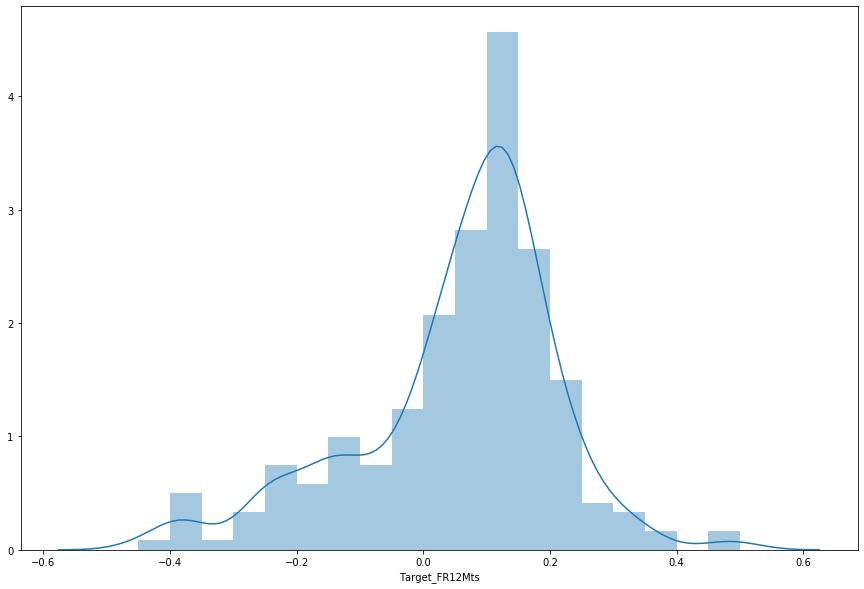

In [109]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data_csv['Target_FR12Mts'])


In [110]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
coeff_df = pd.DataFrame(regressor.coef_, feature_columns, columns=['Coefficient'])  
coeff_df

,Coefficient
XLF,-0.013456
XLK,0.003253
XLI,-0.009035
HY,0.050894
XLY,0.027038
XLU,0.008188
XLP,-0.002455
SPY,-0.010694
VBMFX,-0.090422


In [112]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head()

,Actual,Predicted
24,-0.13,1.008716
6,0.06,0.463088
222,0.12,0.267562
208,0.15,-0.097148
236,0.01,-0.221148


In [113]:
y_pred = regressor.predict(X_test)

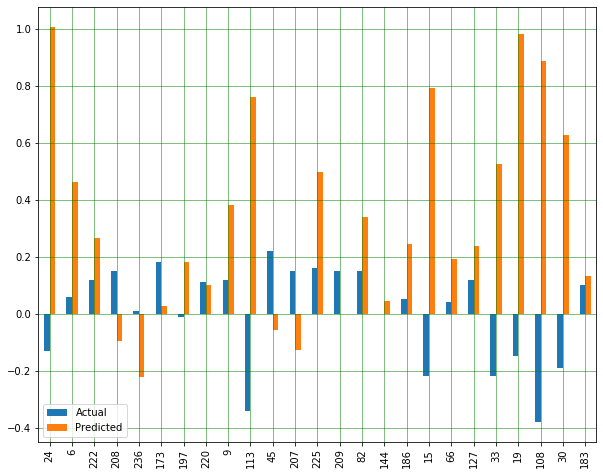

In [114]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [115]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08667858259545877
Mean Squared Error: 0.012865569438396191
Root Mean Squared Error: 0.11342649354712589
